# Data Analytics I
~~~
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
 
The objective is to predict the value of prices of the house using the given features.
~~~

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.shape

(506, 14)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [11]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [12]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
89,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71,26.7
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [14]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [19]:
# Replace missing values with the mean
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

In [20]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

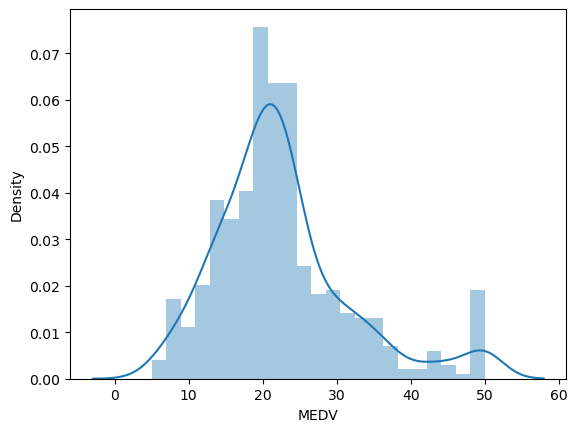

In [21]:
sns.distplot(df['MEDV'])

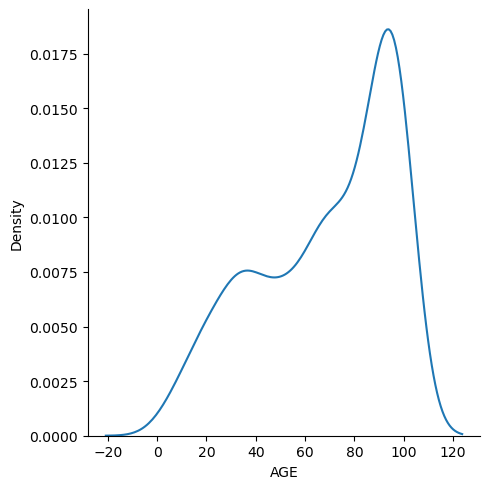

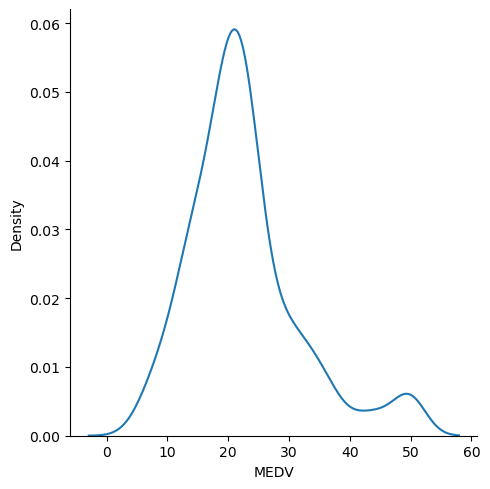

In [22]:
sns.displot(data=df, x='AGE', kind='kde')
sns.displot(data=df, x='MEDV', kind='kde')

<AxesSubplot:>

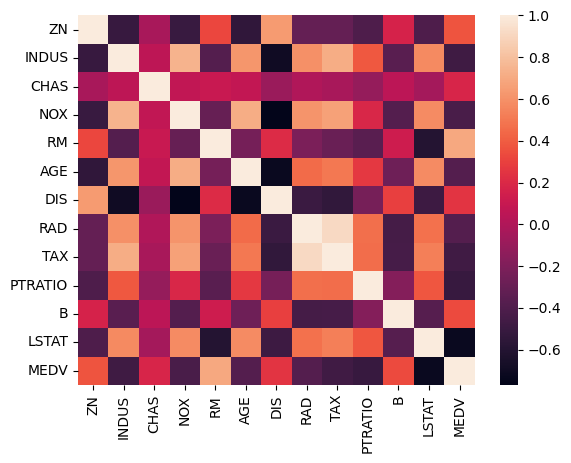

In [23]:
sns.heatmap(df.iloc[:,1:].corr())

# Handling Outliers With Capping

# 1.For RM

In [38]:
Q1, Q3 = np.percentile(df['RM'], [25, 75])
print(f"Q1 is {Q1} || and Q3 is {Q3}")
IQR = Q3 - Q1
print(f"IQR is : {IQR}")
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(f"Lower Limit is {lower_limit} and Upper Limit is {upper_limit}")

Q1 is 5.8854999999999995 || and Q3 is 6.6235
IQR is : 0.7380000000000004
Lower Limit is 4.778499999999999 and Upper Limit is 7.730500000000001


In [39]:
outliers_RM = [outlier for outlier in df['RM'] if outlier > upper_limit or outlier < lower_limit]
print(f"Outliers in RM column are {outliers_RM}")

Outliers in RM column are [8.069, 7.82, 7.802, 8.375, 7.929, 7.765, 7.831, 7.875, 7.853, 8.034, 8.266, 8.725, 8.04, 8.337, 8.247, 8.259, 8.704, 8.398, 8.297, 7.82, 7.923, 8.78, 3.561, 3.863, 4.138, 4.368, 4.652, 4.138, 4.628, 4.519]


In [40]:
df['RM'] = np.where(df['RM'] > upper_limit, upper_limit, np.where(df['RM'] < lower_limit, lower_limit, df['RM']))

<AxesSubplot:xlabel='RM'>

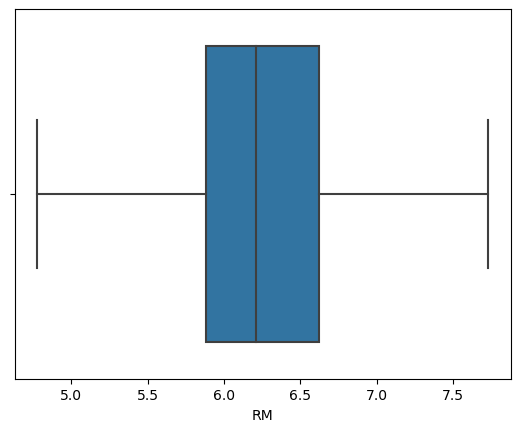

In [41]:
sns.boxplot(data=df, x='RM')

# 2.For LSTAT

In [42]:
Q1, Q3 = np.percentile(df['LSTAT'], [25, 75])
print(f"Q1 is {Q1} || and Q3 is {Q3}")
IQR = Q3 - Q1
print(f"IQR is : {IQR}")
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(f"Lower Limit is {lower_limit} and Upper Limit is {upper_limit}")

Q1 is 7.2299999999999995 || and Q3 is 16.57
IQR is : 9.34
Lower Limit is -6.78 and Upper Limit is 30.58


In [43]:
outliers_LSTAT = [outlier for outlier in df['LSTAT'] if outlier > upper_limit or outlier < lower_limit]
print(f"Outliers in LSTAT column are {outliers_LSTAT}")

Outliers in LSTAT column are [30.81, 34.41, 34.77, 37.97, 30.63, 30.81, 31.99, 30.62, 30.59, 34.37, 36.98, 34.02]


In [44]:
df['LSTAT'] = np.where(df['LSTAT'] > upper_limit, upper_limit, np.where(df['LSTAT'] < lower_limit, lower_limit, df['LSTAT']))

<AxesSubplot:xlabel='LSTAT'>

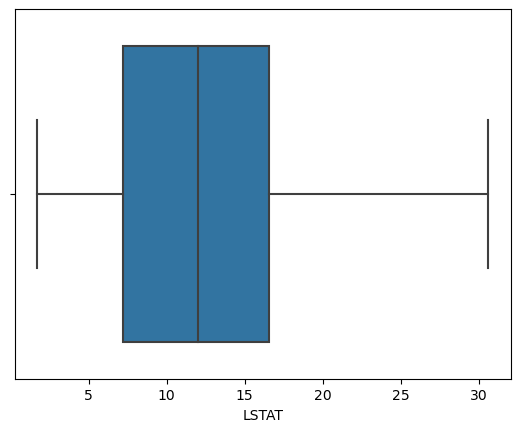

In [45]:
sns.boxplot(data=df, x='LSTAT')

# Preparing Data For Training

In [46]:
x = df.drop('MEDV', axis=1)
y = df['MEDV'] 

In [54]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [55]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# Multiple linear regression (1 dependent,two or more independent1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
# you would need to swap y_test and y_train in the call to train_test_split()

In [56]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
167,1.80028,11.211934,19.58,0.0,0.605,5.877,79.2,2.4259,5,403,14.7,227.61,12.14
318,0.40202,0.000000,9.90,0.0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36
99,0.06860,0.000000,2.89,0.0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19
307,0.04932,33.000000,2.18,0.0,0.472,6.849,70.3,3.1827,7,222,18.4,396.90,7.53
404,41.52920,0.000000,18.10,0.0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.000000,7.38,0.0,0.493,6.426,52.3,4.5404,5,287,19.6,396.90,7.20
15,0.62739,0.000000,8.14,0.0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
484,2.37857,0.000000,18.10,0.0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34
125,0.16902,0.000000,25.65,0.0,0.581,5.986,88.4,1.9929,2,188,19.1,385.02,14.81


In [57]:
X_train.shape

(379, 13)

In [58]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,11.083992,0.0,0.472,6.616,58.100000,3.3700,7,222,18.4,393.36,8.930000
193,0.02187,60.0,2.930000,0.0,0.401,6.800,68.518519,6.2196,1,265,15.6,393.37,5.030000
65,0.03584,80.0,3.370000,0.0,0.398,6.290,17.800000,6.6115,4,337,16.1,396.90,4.670000
349,0.02899,40.0,1.250000,0.0,0.429,6.939,34.500000,8.7921,1,335,19.7,389.85,12.715432
151,1.49632,0.0,19.580000,0.0,0.871,5.404,100.000000,1.5916,5,403,14.7,341.60,13.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.17331,0.0,9.690000,0.0,0.585,5.707,54.000000,2.3817,6,391,19.2,396.90,12.010000
142,3.32105,0.0,19.580000,1.0,0.871,5.403,100.000000,1.3216,5,403,14.7,396.90,26.820000
26,0.67191,0.0,8.140000,0.0,0.538,5.813,90.300000,4.6820,4,307,21.0,376.88,14.810000
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.040000


In [59]:
X_test.shape

(127, 13)

In [60]:
y_train.shape

(379,)

In [61]:
y_test.shape

(127,)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [49]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(X_test)
print(y_pred)

[30.69738394 32.3755894  30.43173893 19.76952703 18.32498944 16.30066895
 36.25025053 14.24824752 24.68857946 31.74847359 21.3521631  31.15041612
 28.01754116 33.8939192  29.43580257 38.58385605 24.90616974 22.91739884
 25.68438437 21.44649415 33.16997547 17.58029801 25.34851999 25.38556754
 32.67116476 20.5920298  19.55666683 17.71395508 39.16415239  2.38390574
 32.69702486 32.49811308 25.84490896 24.57426831 20.20918913 19.53474413
  5.83341151 34.9079219  26.94844436 27.84400754 31.08210417 29.78670051
 18.09068934 31.60842729 17.88020091 28.36831339 19.0078676  21.27784763
 38.45138814 16.39540968 23.9986365  19.23409484 24.34183042 35.35889543
 26.89160066 35.24330339 20.97154732 19.65287332 18.21034729 25.61239021
 19.72017374 23.21370877 37.83244602 40.10081966 30.83423786 16.78091326
 24.15583335  3.96919361 30.91763479 28.41822103 18.09031411 27.69591964
 19.05877436 24.27605668 25.31438267 10.86193684 36.27136221  7.7606409
 18.09338565 30.89081373 22.95504918 16.59971102 20.

In [62]:
predictionDec = {"y_test":y_test, "prediction":y_pred}
predictionData = pd.DataFrame(predictionDec)
predictionData

,y_test,prediction
305,28.4,30.697384
193,31.1,32.375589
65,23.5,30.431739
349,26.6,19.769527
151,19.6,18.324989
...,...,...
493,21.8,20.967879
142,13.4,13.763899
26,16.6,16.095424
173,23.6,28.885937


In [63]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [64]:
r2

0.659812267275977

In [65]:
mse

5.823448841319916

# Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=5)

In [76]:
# Predicting the PROFIT for the Test values
y_prediction = dtr.predict(X_test)
print(y_prediction)

[29.  32.  31.2 22.  14.5 14.1 43.1 14.5 18.5 44.8 19.3 29.  21.4 32.4
 24.8 50.  24.4 16.8 23.3 15.6 35.4 14.2 23.  24.4 32.9 18.7 19.5 13.
 43.5 12.  32.2 28.7 24.4 25.3 18.4 20.3  8.4 34.9 23.1 22.6 48.3 26.5
  8.8 31.2 18.8 28.  21.7 15.  50.  14.5 19.1 18.4 24.  50.  26.6 31.
 23.3 21.7 18.6 17.8 20.1 19.3 50.  50.  23.7 16.2 23.1  7.4 29.1 35.2
 17.8 32.  20.  50.  20.2 17.3 44.8 10.5 18.2 29.9 18.2 22.  20.9 24.4
 28.7 29.8 23.8 32.9 28.7 10.4 28.7 18.2 22.9 24.8 21.4 18.9 28.  22.4
 23.3 19.2 24.5 17.1 18.5 14.5 15.6 21.7 17.5 16.2 30.8 22.  13.3 19.2
 20.2 29.  20.3 17.2 15.6 20.3 13.1 20.3 17.8 34.6 21.2 15.6 13.9 22.6
 23.2]


In [77]:
predictionDec = {"y_test":y_test, "prediction":y_prediction}
predictionData = pd.DataFrame(predictionDec)
predictionData

,y_test,prediction
305,28.4,29.0
193,31.1,32.0
65,23.5,31.2
349,26.6,22.0
151,19.6,14.5
...,...,...
493,21.8,21.2
142,13.4,15.6
26,16.6,13.9
173,23.6,22.6


In [78]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_prediction)
mse = np.sqrt(mean_squared_error(y_test, y_prediction))

In [79]:
r2

0.7448600691386815

In [80]:
mse

5.0432460487925255